In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
amesprice= pd.read_csv("Ames_HousePrice.csv")
amesreal= pd.read_csv("Ames Real Estate Data.csv", dtype='object', index_col = 0)

In [5]:
amesreal.head()

,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,ClassSc_S,...,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
MapRefNo,,,,,,,,,,,,,,,,,,,,,
520400001,0520400001,0,0,4599 GEORGE W CARVER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4599,NaN,GEORGE W CARVER,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520440010,0520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4507,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520440020,0520440020,0,0,4513 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4513,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520445001,0520445001,0,0,3449 BARCELOS ST,FS-RL,NaN,NaN,NaN,RESIDENTIAL,ASSOCIATION COMMON AREA,...,3449,NaN,BARCELOS,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520445010,0520445010,0,0,4506 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4506,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


In [6]:
amesprice.head()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


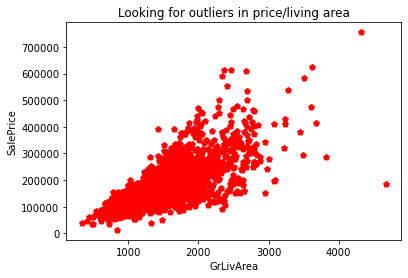

In [7]:
plt.scatter(amesprice.GrLivArea, amesprice.SalePrice, c = "red", marker = "p")
plt.title("Looking for outliers in price/living area")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [8]:
print("minimum price: ",amesprice.SalePrice.min())
print("maximum price: ",amesprice.SalePrice.max())
print("average price: ",amesprice.SalePrice.mean())
print("median price: ",amesprice.SalePrice.median())
print("mode price: ",amesprice.SalePrice.mode())
#finding the minimum and max, mean, median and mode price

minimum price:  12789
maximum price:  755000
average price:  178059.62325581396
median price:  159900.0
mode price:  0    135000
dtype: int64


<AxesSubplot:>

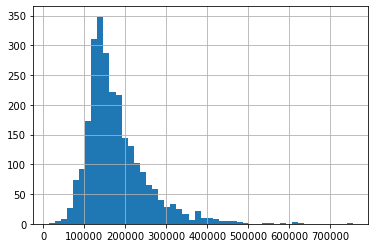

In [9]:
amesprice.SalePrice.hist(bins=50)
#looking at the distribution of the prices

In [10]:
corr = amesprice.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.790501
GrLivArea        0.719981
TotalBsmtSF      0.652222
1stFlrSF         0.642613
GarageCars       0.638801
GarageArea       0.634992
YearBuilt        0.544370
FullBath         0.534982
GarageYrBlt      0.520763
YearRemodAdd     0.514309
MasVnrArea       0.500964
TotRmsAbvGrd     0.490219
Fireplaces       0.488184
BsmtFinSF1       0.460792
LotFrontage      0.358577
WoodDeckSF       0.333232
OpenPorchSF      0.306540
BsmtFullBath     0.291080
HalfBath         0.285875
LotArea          0.274443
2ndFlrSF         0.263144
BsmtUnfSF        0.167519
BedroomAbvGr     0.151806
ScreenPorch      0.121463
3SsnPorch        0.031260
PoolArea         0.030844
BsmtFinSF2       0.022520
MoSold           0.012591
YrSold          -0.001376
MiscVal         -0.018877
Unnamed: 0      -0.028413
LowQualFinSF    -0.030835
BsmtHalfBath    -0.033802
MSSubClass      -0.084587
OverallCond     -0.101091
KitchenAbvGr    -0.113977
EnclosedPorch   -0.123235
PID         

In [11]:
amesprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2580 non-null   int64  
 1   PID            2580 non-null   int64  
 2   GrLivArea      2580 non-null   int64  
 3   SalePrice      2580 non-null   int64  
 4   MSSubClass     2580 non-null   int64  
 5   MSZoning       2580 non-null   object 
 6   LotFrontage    2118 non-null   float64
 7   LotArea        2580 non-null   int64  
 8   Street         2580 non-null   object 
 9   Alley          168 non-null    object 
 10  LotShape       2580 non-null   object 
 11  LandContour    2580 non-null   object 
 12  Utilities      2580 non-null   object 
 13  LotConfig      2580 non-null   object 
 14  LandSlope      2580 non-null   object 
 15  Neighborhood   2580 non-null   object 
 16  Condition1     2580 non-null   object 
 17  Condition2     2580 non-null   object 
 18  BldgType

In [12]:
amesreal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22213 entries, 520400001 to 1018100150
Data columns (total 90 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GeoRefNo      22213 non-null  object
 1   Tier          22213 non-null  object
 2   Range         22213 non-null  object
 3   Prop_Addr     22193 non-null  object
 4   ZngCdPr       22107 non-null  object
 5   ZngCdSc       26 non-null     object
 6   ZngOLPr       1970 non-null   object
 7   ZngOLSc       153 non-null    object
 8   ClassPr_S     22213 non-null  object
 9   ClassSc_S     22213 non-null  object
 10  Legal_Pr      22213 non-null  object
 11  SchD_S        22213 non-null  object
 12  TxD_S         22213 non-null  object
 13  MA_Ownr1      22213 non-null  object
 14  MA_Ownr2      2876 non-null   object
 15  MA_Line1      22199 non-null  object
 16  MA_Line2      0 non-null      object
 17  MA_City       22199 non-null  object
 18  MA_State      22199 non-null  obj

In [13]:
newdf=amesprice[amesprice["Fireplaces"]==1]
newdf

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
5,6,908128060,1922,198500,85,RL,64.0,7301,Pave,NaN,...,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal
7,8,528228540,1246,187687,20,RL,53.0,3710,Pave,NaN,...,0,0,NaN,NaN,NaN,0,3,2008,New,Partial
10,11,528186170,1342,219500,120,RL,48.0,6240,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
23,24,902326030,2640,265979,70,RM,65.0,11700,Pave,Pave,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,758,908128100,1724,196500,60,RL,62.0,7162,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
2575,759,903205040,952,121000,30,RL,NaN,8854,Pave,NaN,...,40,0,NaN,NaN,NaN,0,5,2009,WD,Normal
2576,760,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
2578,762,907192040,1842,217500,60,RL,NaN,8826,Pave,NaN,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal


In [14]:
newdf.isna().sum()

Unnamed: 0       0
PID              0
GrLivArea        0
SalePrice        0
MSSubClass       0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 82, dtype: int64

In [15]:
amesprice[amesprice['PoolArea']>0].info()
#poolarea greater than 0 means theres a pool-looking at how many have pools

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 65 to 2473
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     9 non-null      int64  
 1   PID            9 non-null      int64  
 2   GrLivArea      9 non-null      int64  
 3   SalePrice      9 non-null      int64  
 4   MSSubClass     9 non-null      int64  
 5   MSZoning       9 non-null      object 
 6   LotFrontage    9 non-null      float64
 7   LotArea        9 non-null      int64  
 8   Street         9 non-null      object 
 9   Alley          0 non-null      object 
 10  LotShape       9 non-null      object 
 11  LandContour    9 non-null      object 
 12  Utilities      9 non-null      object 
 13  LotConfig      9 non-null      object 
 14  LandSlope      9 non-null      object 
 15  Neighborhood   9 non-null      object 
 16  Condition1     9 non-null      object 
 17  Condition2     9 non-null      object 
 18  BldgType  

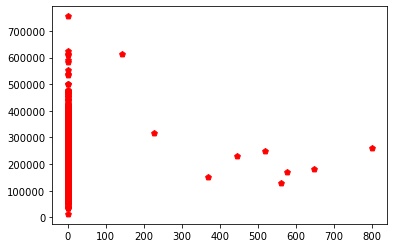

In [16]:
#just seeing if theres a relationship between having a pool and sales price
plt.scatter(amesprice.PoolArea, amesprice.SalePrice, c = "red", marker = "p")

In [17]:
#remove poolpc since theres only 9 rows with values and its repetitive with poolarea
amesprice.drop('PoolQC', inplace=True, axis=1)


In [18]:
amesprice.columns

Index(['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
    

In [19]:
size_related = amesprice.filter(regex='SF$|Area$')


<AxesSubplot:>

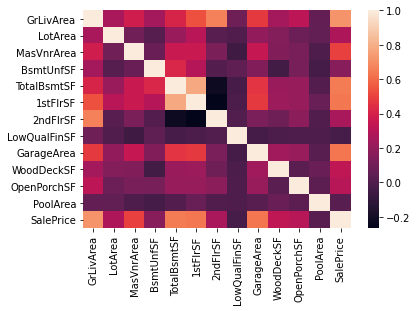

In [20]:
corr = pd.concat([size_related, amesprice['SalePrice']], axis=1).corr()
sns.heatmap(corr)

In [21]:
print(corr[corr>0.5]) #0.5 to 0.7 is moderate correlation

              GrLivArea  LotArea  MasVnrArea  BsmtUnfSF  TotalBsmtSF  \
GrLivArea      1.000000      NaN         NaN        NaN          NaN   
LotArea             NaN      1.0         NaN        NaN          NaN   
MasVnrArea          NaN      NaN    1.000000        NaN          NaN   
BsmtUnfSF           NaN      NaN         NaN        1.0          NaN   
TotalBsmtSF         NaN      NaN         NaN        NaN     1.000000   
1stFlrSF       0.539135      NaN         NaN        NaN     0.784634   
2ndFlrSF       0.665001      NaN         NaN        NaN          NaN   
LowQualFinSF        NaN      NaN         NaN        NaN          NaN   
GarageArea          NaN      NaN         NaN        NaN          NaN   
WoodDeckSF          NaN      NaN         NaN        NaN          NaN   
OpenPorchSF         NaN      NaN         NaN        NaN          NaN   
PoolArea            NaN      NaN         NaN        NaN          NaN   
SalePrice      0.719981      NaN    0.500964        NaN     0.65

In [22]:
#based on this- GrLivArea, MasVnrArea, TotalBsmtSF, 1stFlrSF, GarageArea have 
# the highest correllations with saleprice

/Users/amandamanfredo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

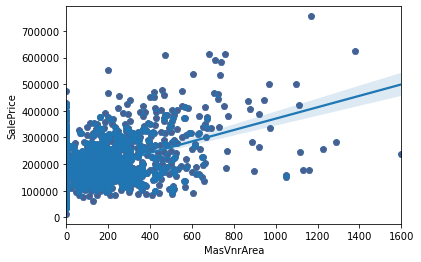

In [23]:
plt.scatter(amesprice.MasVnrArea, amesprice.SalePrice, c = "red", marker = "p")
sns.regplot(amesprice.MasVnrArea, amesprice.SalePrice)

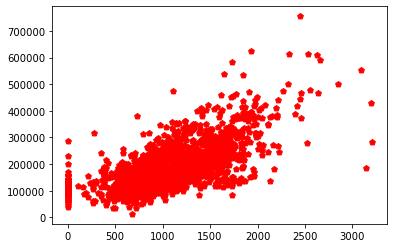

In [24]:
plt.scatter(amesprice.TotalBsmtSF, amesprice.SalePrice, c = "red", marker = "p")

/Users/amandamanfredo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

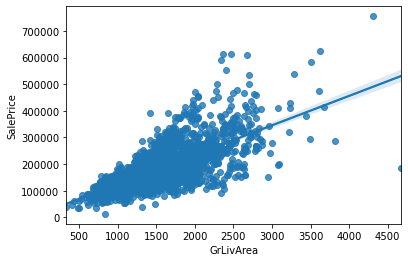

In [25]:
sns.regplot(amesprice.GrLivArea, amesprice.SalePrice)

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

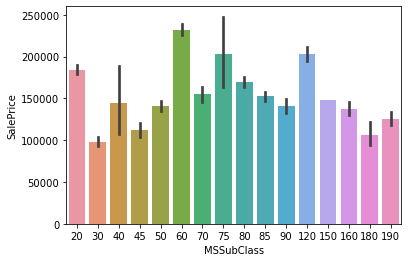

In [26]:
sns.barplot(x='MSSubClass', y='SalePrice', data=amesprice)
#  60	2-STORY 1946 & NEWER has the highest value

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

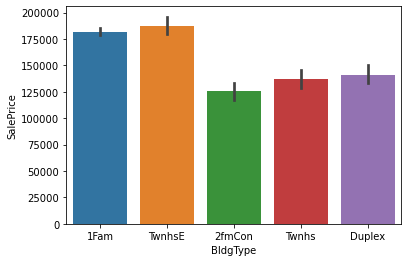

In [27]:
sns.barplot(x='BldgType', y='SalePrice', data=amesprice)
#Townhouse End Unit has highest avg followed by Single-family Detached

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

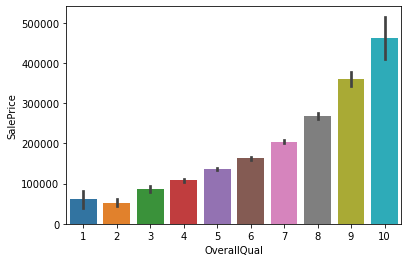

In [28]:
sns.barplot(x='OverallQual',y='SalePrice', data=amesprice)
#obviously higher quality material and finish homes sell for more

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

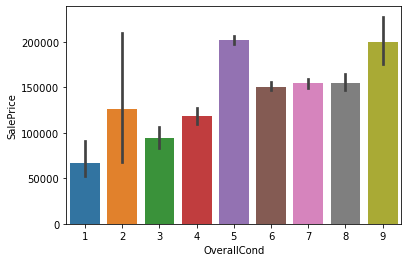

In [29]:
sns.barplot(x='OverallCond',y='SalePrice', data=amesprice)
#average quality houses have a higher mean than quality 9 with is weird

(array([   4.,    8.,   39.,   88., 1402.,  498.,  360.,  140.,   41.]),
 array([1.        , 1.88888889, 2.77777778, 3.66666667, 4.55555556,
        5.44444444, 6.33333333, 7.22222222, 8.11111111, 9.        ]),
 <BarContainer object of 9 artists>)

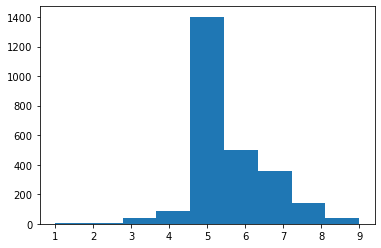

In [157]:
#print(amesprice.loc[amesprice['OverallCond']==5])
plt.hist(x=amesprice['OverallCond'], bins=9)

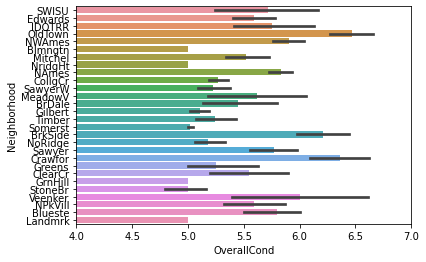

In [169]:
sns.barplot(y='Neighborhood', x='OverallCond', data=amesprice)
plt.xlim(4, 7)
fig_dims = (30, 30)

<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

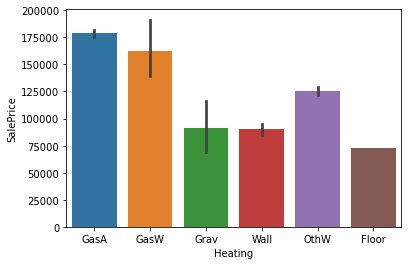

In [30]:
sns.barplot(x='Heating', y='SalePrice', data=amesprice)
#  GasA	Gas forced warm air furnace
#GasW	Gas hot water or steam heat

<AxesSubplot:xlabel='CentralAir', ylabel='SalePrice'>

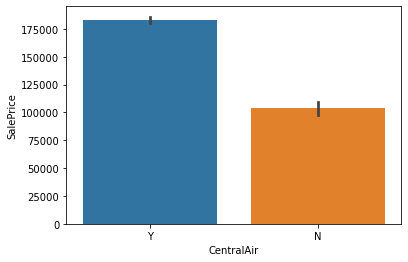

In [31]:
sns.barplot(x='CentralAir', y='SalePrice', data=amesprice)

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

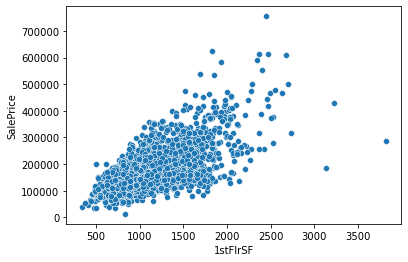

In [32]:
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=amesprice)
#looking at 1stfloor footage vs saleprice since we've seen 
#there is a positive correlation

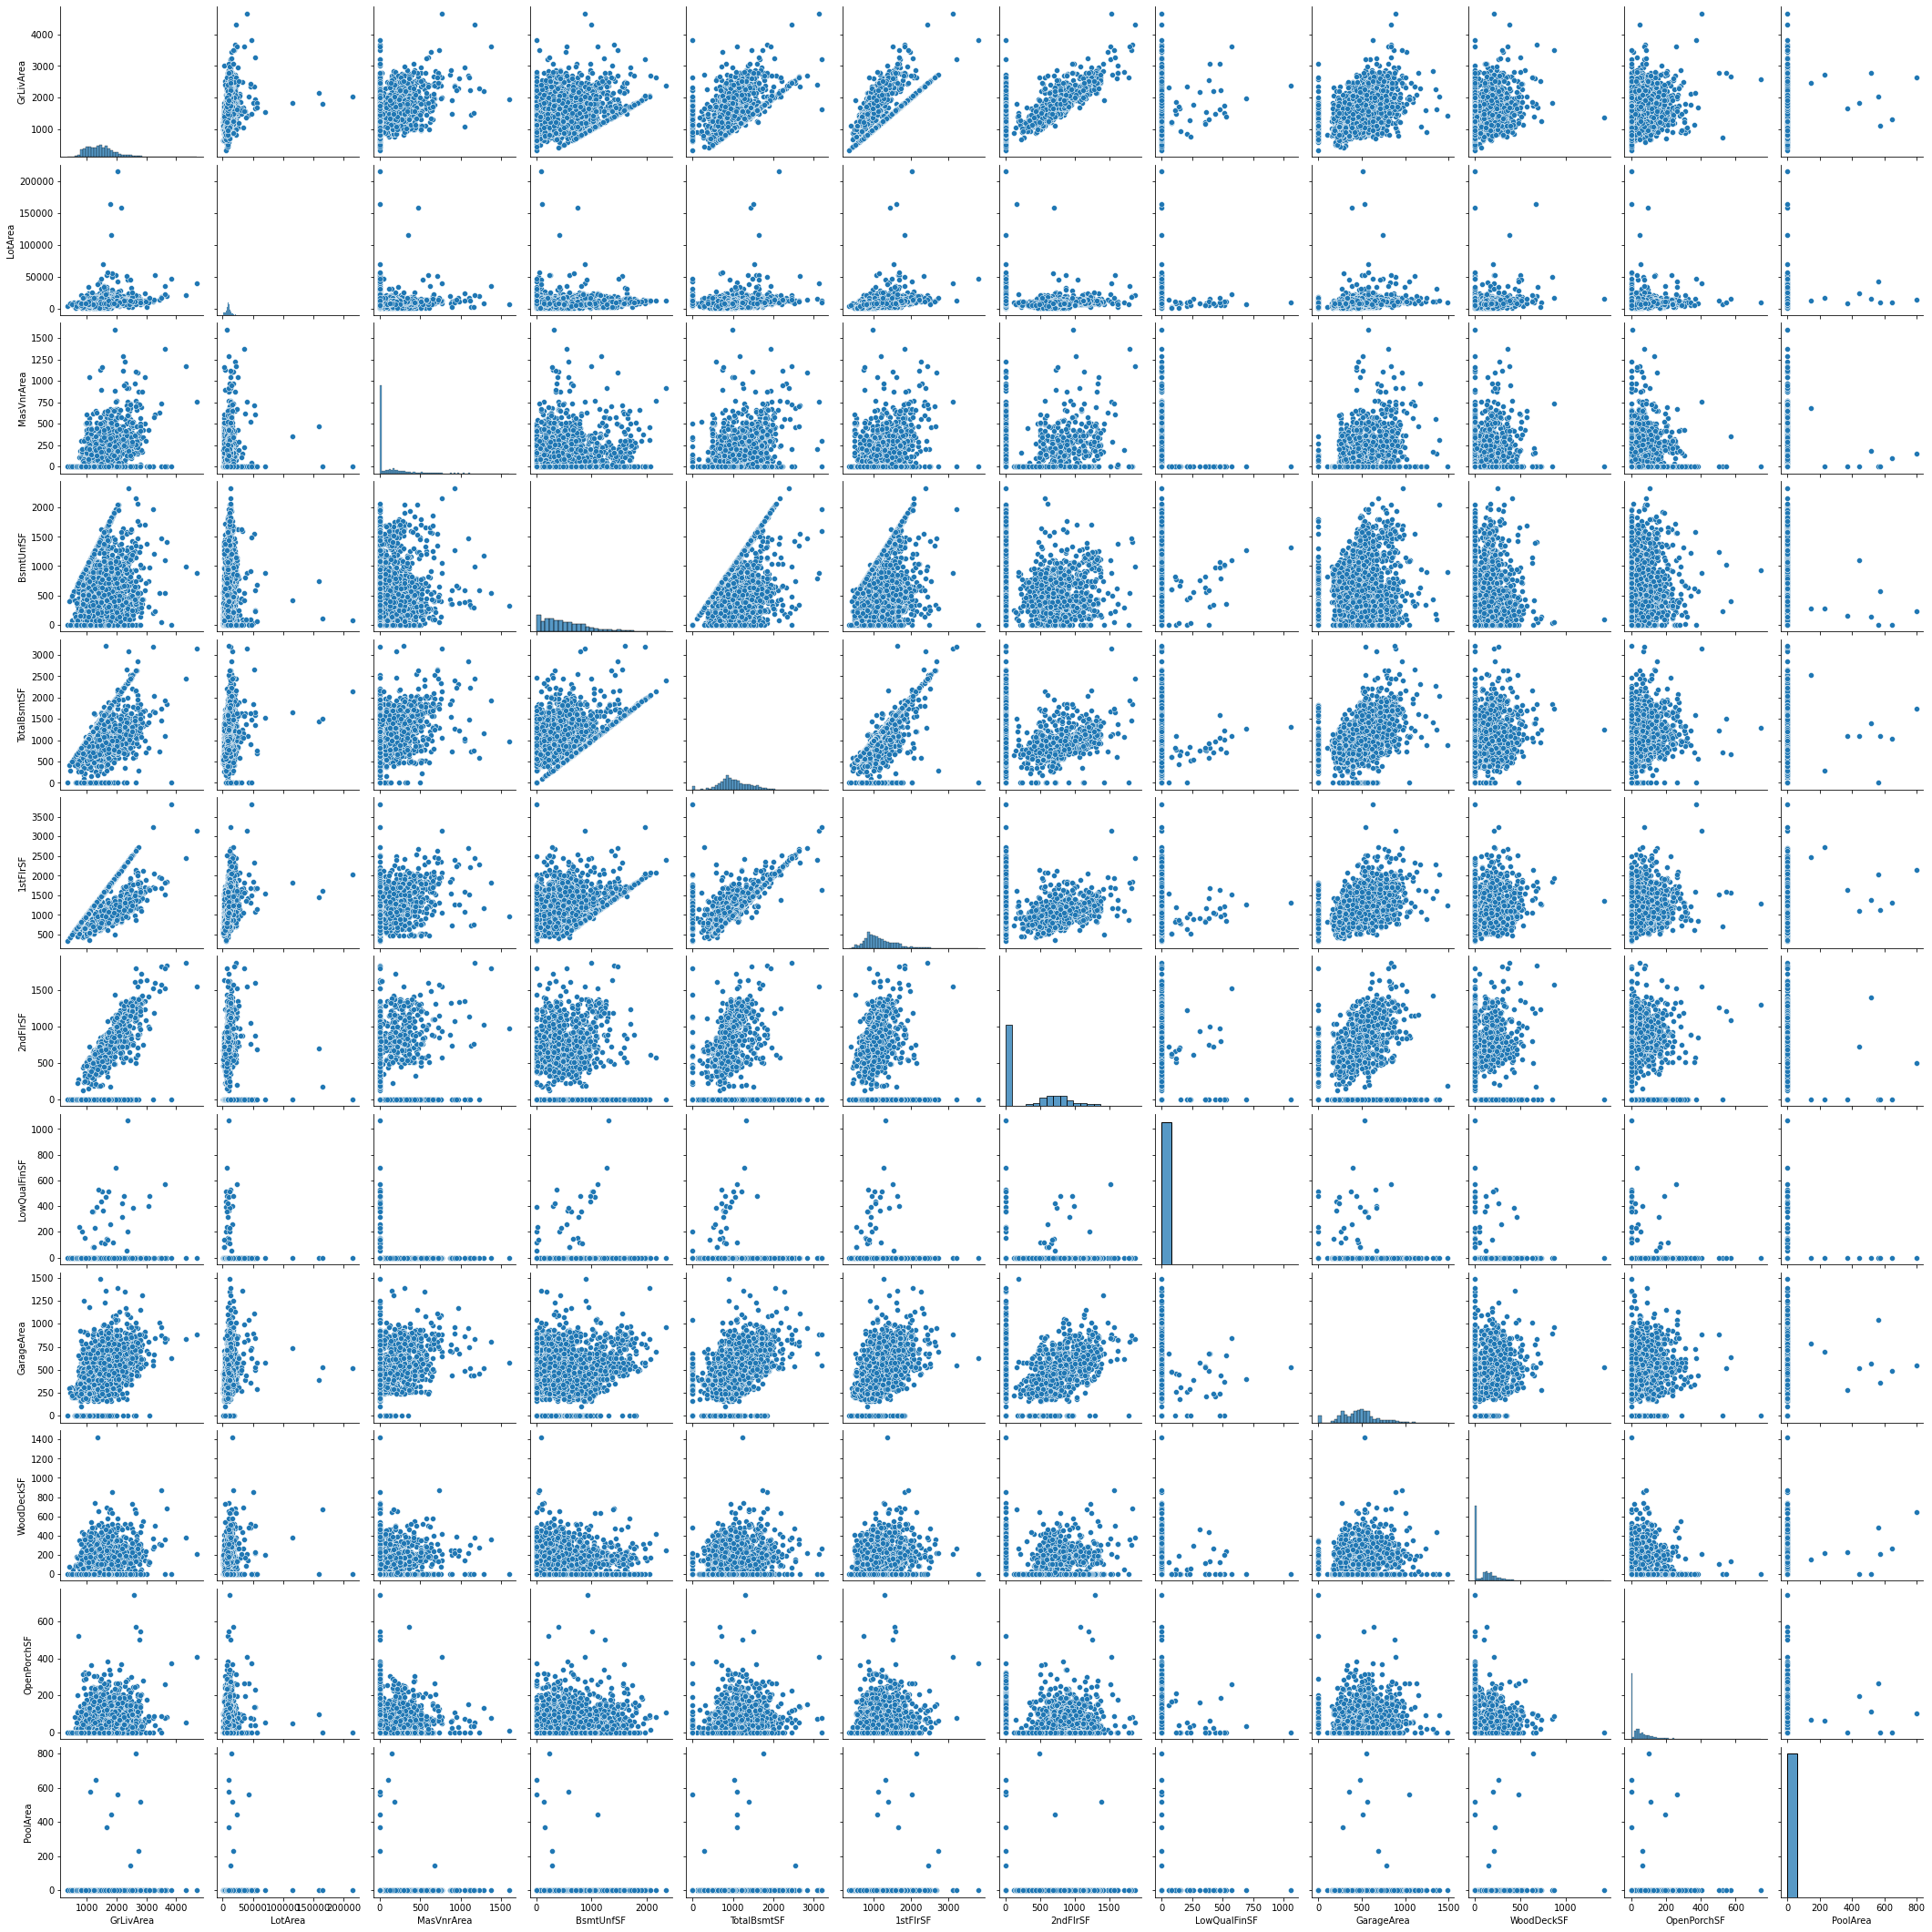

In [44]:
sns.pairplot(data=size_related)

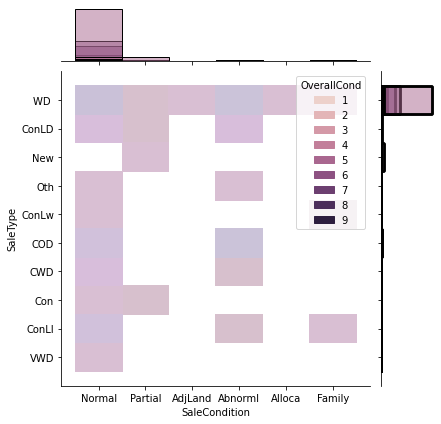

In [45]:
sns.jointplot(data=amesprice, x="SaleCondition", y="SaleType", hue="OverallCond", kind="hist")

In [ ]:
 #WD 	Warranty Deed - Conventional 
# Normal	Normal Sale


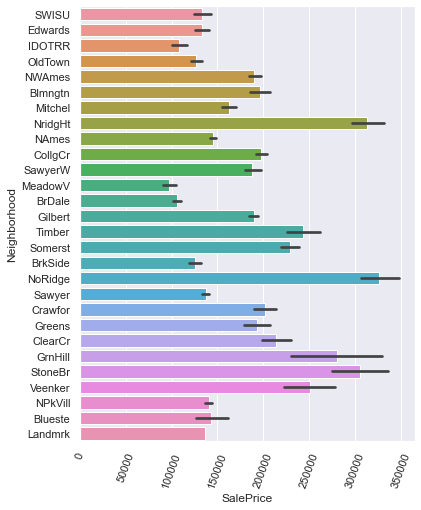

In [44]:
#find which neighborhoods cost more
sns.barplot(y='Neighborhood', x='SalePrice', data=amesprice)
plt.xticks(rotation=70)
sns.set(rc={"figure.figsize":(20, 8)})

In [28]:
#Northridge Heights         NW
#Northridge                 NW
#Stone Brook                NO
#have the highest average price

TypeError: concat() got multiple values for argument 'axis'

In [53]:
expenhouse=amesprice.loc[(amesprice['SalePrice'] >= 300000)]
expenarea=expenhouse.filter(regex='SF$|Area$')

<AxesSubplot:>

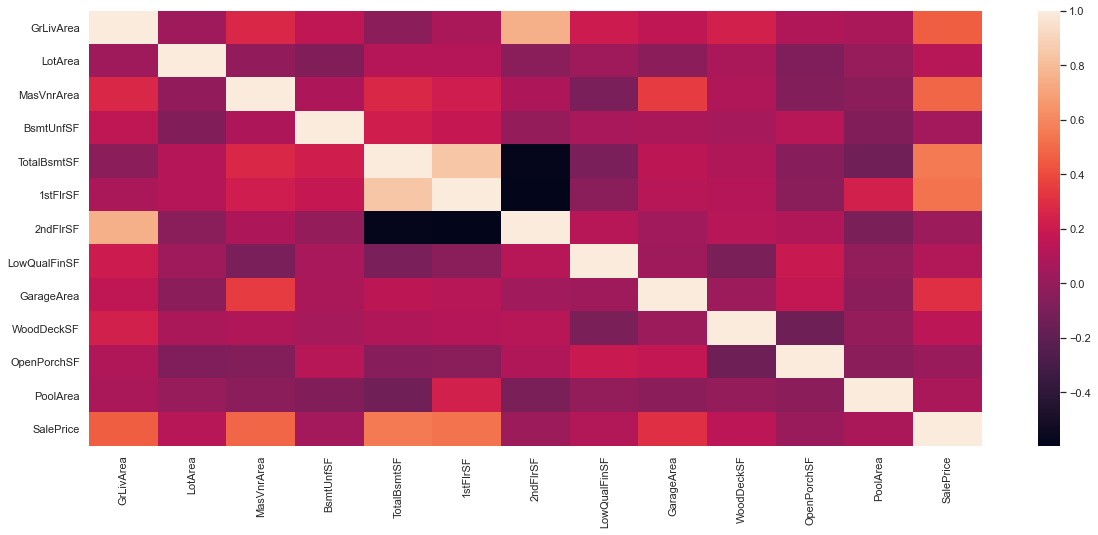

In [55]:
#trying to see if theres any correllations in the more expensive houses
corr1 = pd.concat([expenarea, expenhouse['SalePrice']], axis=1).corr()
sns.heatmap(corr1)

In [56]:
print(corr1[corr1>0.5])
#in the more expensive houses theres a correllation for sales price
# with TotalBsmtSF & 1stFlrSF  

              GrLivArea  LotArea  MasVnrArea  BsmtUnfSF  TotalBsmtSF  \
GrLivArea      1.000000      NaN         NaN        NaN          NaN   
LotArea             NaN      1.0         NaN        NaN          NaN   
MasVnrArea          NaN      NaN         1.0        NaN          NaN   
BsmtUnfSF           NaN      NaN         NaN        1.0          NaN   
TotalBsmtSF         NaN      NaN         NaN        NaN     1.000000   
1stFlrSF            NaN      NaN         NaN        NaN     0.843833   
2ndFlrSF       0.754963      NaN         NaN        NaN          NaN   
LowQualFinSF        NaN      NaN         NaN        NaN          NaN   
GarageArea          NaN      NaN         NaN        NaN          NaN   
WoodDeckSF          NaN      NaN         NaN        NaN          NaN   
OpenPorchSF         NaN      NaN         NaN        NaN          NaN   
PoolArea            NaN      NaN         NaN        NaN          NaN   
SalePrice           NaN      NaN         NaN        NaN     0.55

In [59]:
import scipy.stats as st  #if it were normally distributed
st.t.interval(alpha=0.95, df=len(amesprice)-1, loc= 178059.62325581396, scale=st.sem(amesprice.SalePrice))

(175163.05773086424, 180956.18878076368)

In [63]:
#making a dataframe of moderately priced homes to see their correlations
moderatehome= amesprice.loc[(amesprice['SalePrice'] < 300000) & (amesprice['SalePrice']>95000)]
modsize=moderatehome.filter(regex='SF$|Area$')

<AxesSubplot:>

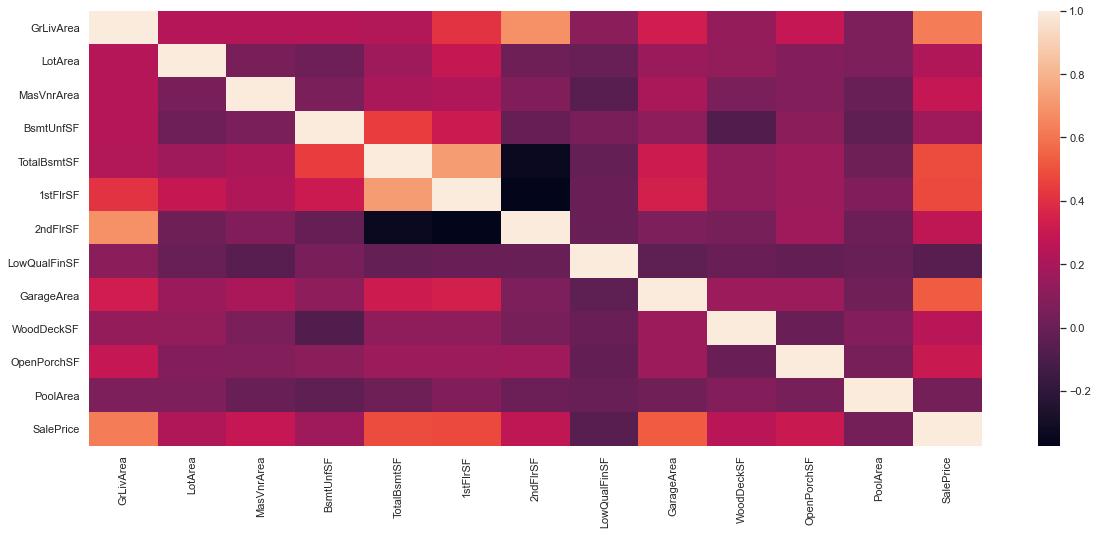

In [64]:
corr2 = pd.concat([modsize, moderatehome['SalePrice']], axis=1).corr()
sns.heatmap(corr2)

In [65]:
#finding which columns have a significant correlation with moderate home sales price
print(corr2[corr2>0.5])
#interesting that GarageArea has a correlation in moderately priced homes but not in expensive homes

              GrLivArea  LotArea  MasVnrArea  BsmtUnfSF  TotalBsmtSF  \
GrLivArea      1.000000      NaN         NaN        NaN          NaN   
LotArea             NaN      1.0         NaN        NaN          NaN   
MasVnrArea          NaN      NaN         1.0        NaN          NaN   
BsmtUnfSF           NaN      NaN         NaN        1.0          NaN   
TotalBsmtSF         NaN      NaN         NaN        NaN     1.000000   
1stFlrSF            NaN      NaN         NaN        NaN     0.721326   
2ndFlrSF       0.686499      NaN         NaN        NaN          NaN   
LowQualFinSF        NaN      NaN         NaN        NaN          NaN   
GarageArea          NaN      NaN         NaN        NaN          NaN   
WoodDeckSF          NaN      NaN         NaN        NaN          NaN   
OpenPorchSF         NaN      NaN         NaN        NaN          NaN   
PoolArea            NaN      NaN         NaN        NaN          NaN   
SalePrice      0.629023      NaN         NaN        NaN         

/Users/amandamanfredo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


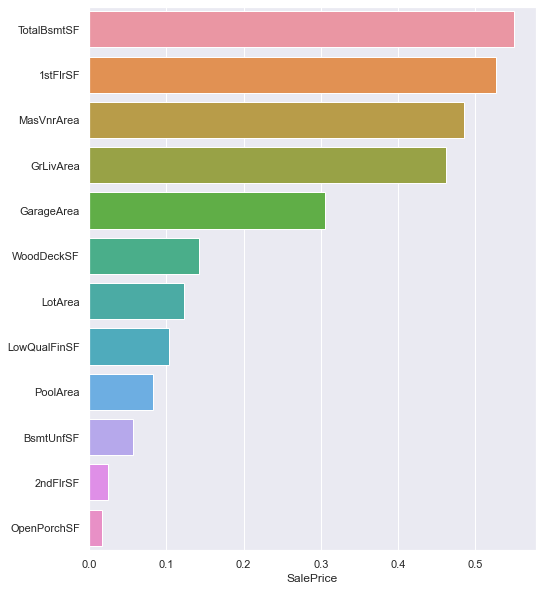

In [68]:
corr3 = corr.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot( corr.SalePrice[1:], corr.index[1:], orient='h')
plt.show()

In [71]:
corr3 = amesprice.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice       1.000000
TotalBsmtSF     0.550984
1stFlrSF        0.527072
MasVnrArea      0.485634
GrLivArea       0.462605
GarageArea      0.305684
WoodDeckSF      0.141541
LotArea         0.122862
LowQualFinSF    0.103033
PoolArea        0.081879
BsmtUnfSF       0.057229
2ndFlrSF        0.023593
OpenPorchSF     0.016682
Name: SalePrice, dtype: float64


In [75]:
#separate types of columns/features
categorical_features = amesprice.select_dtypes(include = ["object"]).columns
numerical_features = amesprice.select_dtypes(exclude = ["object"]).columns

In [76]:
#separating the features into dataframes
amesnum = amesprice[numerical_features]
amescat = amesprice[categorical_features]

<AxesSubplot:>

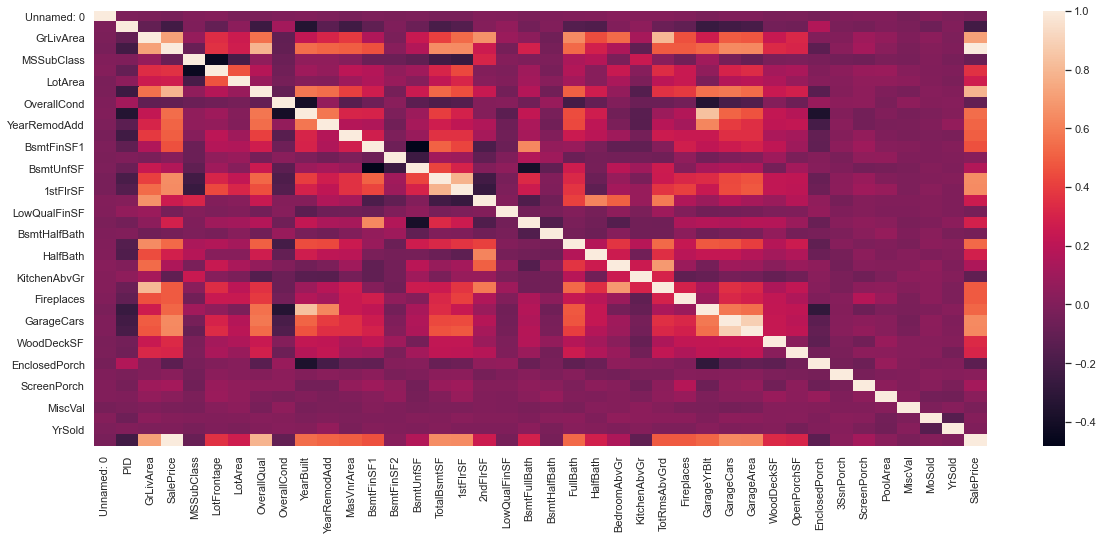

In [85]:
corr3 = pd.concat([amesnum, amesnum['SalePrice']], axis=1).corr()
sns.heatmap(corr3)


In [92]:
pd.isnull(amesprice).sum()

Unnamed: 0       0
PID              0
GrLivArea        0
SalePrice        0
MSSubClass       0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 81, dtype: int64

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

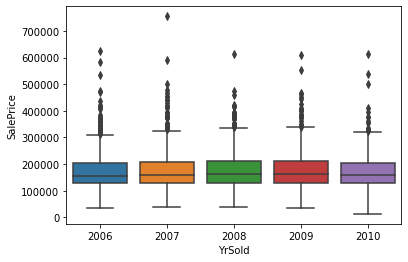

In [34]:
sns.boxplot(x=amesprice['YrSold'], y=amesprice['SalePrice'])

In [38]:
mean_saleprice = amesprice.groupby('MoSold').mean()['SalePrice']

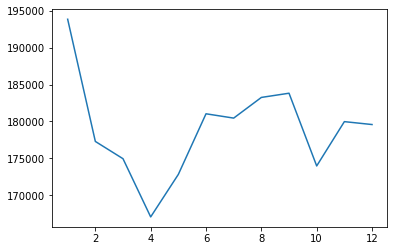

In [39]:
plt.plot(mean_saleprice)

In [40]:
print(mean_saleprice)

MoSold
1     193856.227723
2     177285.595041
3     174941.899522
4     167049.781746
5     172817.118457
6     181035.041394
7     180449.995000
8     183253.896373
9     183824.374046
10    173962.533784
11    179970.948718
12    179577.244186
Name: SalePrice, dtype: float64


In [83]:
'''Looking at the average sale price by month and year sold'''
avgsaleprice = amesprice.groupby(['MoSold', 'YrSold']).mean()['SalePrice']
print(avgsaleprice)

MoSold  YrSold
1       2006      193051.666667
        2007      204752.750000
        2008      184847.666667
        2009      188005.812500
        2010      193368.238095
2       2006      188007.857143
        2007      163981.791667
        2008      193429.440000
        2009      171429.720000
        2010      171013.461538
3       2006      176295.300000
        2007      174905.978723
        2008      164235.818182
        2009      177780.813953
        2010      178828.413043
4       2006      164462.952381
        2007      161389.047619
        2008      160029.789474
        2009      184601.111111
        2010      166394.136364
5       2006      167335.522388
        2007      172200.226190
        2008      172453.026316
        2009      174817.126984
        2010      177211.041096
6       2006      172279.662921
        2007      182641.114583
        2008      185854.237624
        2009      188315.336735
        2010      173366.213333
7       2006      173263.

In [64]:
#figure out which columns to get rid of if too many null values

def percent_null(amesprice):
    percentmis = 100* amesprice.isnull().sum() / len(amesprice)
    return percentmis
percentmis=percent_null(amesprice)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'TotalBsmtSF'),
  Text(1, 0, 'GarageArea'),
  Text(2, 0, 'Electrical'),
  Text(3, 0, 'BsmtUnfSF'),
  Text(4, 0, 'BsmtFinSF1'),
  Text(5, 0, 'BsmtFinSF2'),
  Text(6, 0, 'GarageCars'),
  Text(7, 0, 'BsmtFullBath'),
  Text(8, 0, 'BsmtHalfBath'),
  Text(9, 0, 'MasVnrArea'),
  Text(10, 0, 'MasVnrType'),
  Text(11, 0, 'BsmtFinType1'),
  Text(12, 0, 'BsmtQual'),
  Text(13, 0, 'BsmtCond'),
  Text(14, 0, 'BsmtFinType2'),
  Text(15, 0, 'BsmtExposure'),
  Text(16, 0, 'GarageType'),
  Text(17, 0, 'GarageFinish'),
  Text(18, 0, 'GarageQual'),
  Text(19, 0, 'GarageCond'),
  Text(20, 0, 'GarageYrBlt'),
  Text(21, 0, 'LotFrontage'),
  Text(22, 0, 'FireplaceQu'),
  Text(23, 0, 'Fence'),
  Text(24, 0, 'Alley'),
  Text(25, 0, 'MiscFeature')])

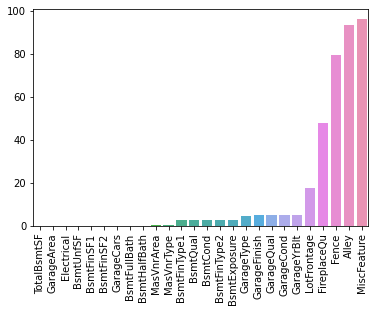

In [69]:
percentmis = percentmis[percentmis>0].sort_values()
sns.barplot(x= percentmis.index, y=percentmis)
plt.xticks(rotation=90)


In [73]:
print(percentmis[percentmis>=75])

Fence          79.651163
Alley          93.488372
MiscFeature    96.240310
dtype: float64


In [193]:
'''
Dropped Contenders
LotFrontage      is approx. 20% null and has similar info to LotArea. could be dropped
Alley            is mostly null and should be dropped
FireplaceQu      1241
Fence            2055
MiscFeature      2483

Fillna contenders

MasVnrType       should have nulls filled
Electrical-1 null
BsmtFullBath        2
BsmtHalfBath        2

Interesting that theres so many basement variables- are all necessary?
BsmtQual           69
BsmtCond           69
BsmtExposure       71
BsmtFinType1       69
BsmtFinSF1          1
BsmtFinType2       70
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1

GarageType        127
GarageYrBlt       129
GarageFinish      129
GarageCars          1
GarageArea          1
GarageQual        129
GarageCond        129
'''


amesprice['MasVnrArea']=amesprice['MasVnrArea'].replace(np.nan, 0)
amesprice['TotalBsmtSF']=amesprice['TotalBsmtSF'].replace(np.nan, 0)

garageordinal=['GarageType','GarageFinish','GarageQual','GarageCond']
for x in garageordinal:
    amesprice[x]=amesprice[x].replace(np.nan,'NA')

garagenum=['GarageCars','GarageArea']
for y in garagenum:
    amesprice[y]=amesprice[y].replace(np.nan, 0)
    
amesprice.isnull().sum()

Unnamed: 0          0
PID                 0
GrLivArea           0
SalePrice           0
MSSubClass          0
MSZoning            0
LotFrontage       462
LotArea             0
Street              0
Alley            2412
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         14
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           69
BsmtCond           69
BsmtExposure       71
BsmtFinType1       69
BsmtFinSF1          1
BsmtFinType2       70
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical

              BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  \
BsmtFinSF1      1.000000         NaN        NaN     0.512642      0.632603   
BsmtFinSF2           NaN         1.0        NaN          NaN           NaN   
BsmtUnfSF            NaN         NaN        1.0          NaN           NaN   
TotalBsmtSF     0.512642         NaN        NaN     1.000000           NaN   
BsmtFullBath    0.632603         NaN        NaN          NaN      1.000000   
BsmtHalfBath         NaN         NaN        NaN          NaN           NaN   
SalePrice            NaN         NaN        NaN     0.652222           NaN   

              BsmtHalfBath  SalePrice  
BsmtFinSF1             NaN        NaN  
BsmtFinSF2             NaN        NaN  
BsmtUnfSF              NaN        NaN  
TotalBsmtSF            NaN   0.652222  
BsmtFullBath           NaN        NaN  
BsmtHalfBath           1.0        NaN  
SalePrice              NaN   1.000000  
['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1'

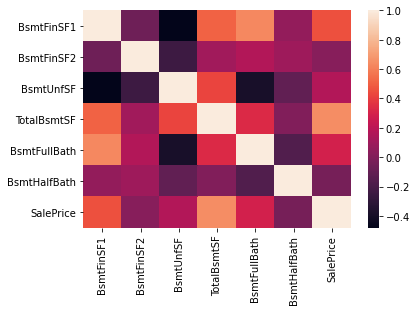

In [189]:
'''Looking at the basement columns with null values- 
Seeing if theres any correlation of certain basement values with SalesPrice or with each other'''
                       
                       
basementfeat= [col for col in amesprice.columns if 'Bsmt' in col]  
corr4 = pd.concat([amesprice[basementfeat], amesprice['SalePrice']], axis=1).corr()
sns.heatmap(corr4)
print(corr4[corr4>0.5])
print(basementfeat)

['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']
              BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  \
BsmtFinSF1      1.000000   -0.058911  -0.480927     0.512642      0.632603   
BsmtFinSF2     -0.058911    1.000000  -0.242334     0.110119      0.169453   
BsmtUnfSF      -0.480927   -0.242334   1.000000     0.421573     -0.383609   
TotalBsmtSF     0.512642    0.110119   0.421573     1.000000      0.330192   
BsmtFullBath    0.632603    0.169453  -0.383609     0.330192      1.000000   
BsmtHalfBath    0.067414    0.101400  -0.108801     0.000899     -0.164064   
SalePrice       0.460792    0.022520   0.167519     0.652222      0.291080   

              BsmtHalfBath  SalePrice  
BsmtFinSF1        0.067414   0.460792  
BsmtFinSF2        0.101400   0.022520  
BsmtUnfSF        -0.108801   0.167519  
TotalBsmtSF       0.000899   0.652222  
BsmtFullBath     -0.164064   0.291080  
BsmtHalfBath      1.000000  -0.03

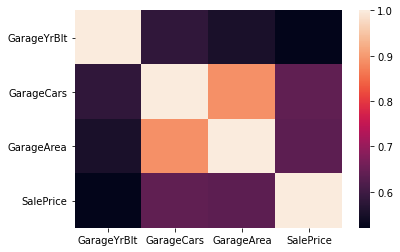

In [188]:
'''Looking at the garage features of the dataset and seeing if there is any correlation with 
other garage features or the sale price'''

garagefeat= [col for col in amesprice.columns if 'Garage' in col]
corr5 = pd.concat([amesprice[garagefeat], amesprice['SalePrice']], axis=1).corr()
sns.heatmap(corr5)
print(garagefeat)
print(corr4)

In [77]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

# Starting the Modeling Process for the AmesPrice dataframe


In [108]:
amesprice1=amesprice.drop('SalePrice', axis=1)

In [ ]:
['int16', 'int32', , 'float16', 'float32', 'float64']

In [171]:
#finding numerical columns
filteredColumns = amesprice1.dtypes[amesprice1.dtypes == [np.int16, np.int32, np.float16, np.float32, np.float64,np.int64]]
listOfColumnNames = list(filteredColumns.index)
listOfColumnNames

ValueError: ('Lengths must match to compare', (81,), (6,))

In [117]:
#dummies=pd.get_dummies((amesprice[categorical], drop_first=True))
#x=pd.concat([amesprice[filteredColumns], dummies], axis=1)


x=amesprice1[listOfColumnNames]
y=amesprice['SalePrice']

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [133]:
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.fit(x_test, y_test)
print('The R2 for this training model is :',lm.score(x_train,y_train))
print('The R2 for this test model is :',lm.score(x_test, y_test))
print('The intercept for this model is:', lm.intercept_)
print('The coefficients for this model are:', lm.coef_)
print('The prediction with linear model:', lm.predict(x))

The R2 for this training model is : 0.8293728735590672
The R2 for this test model is : 0.8358688670415125
The intercept for this model is: -832769.7439227686
The coefficients for this model are: [-8.46226359e-01 -1.17282550e-05  3.75426649e+01 -1.49195076e+02
  5.92861541e-01  1.93800102e+04  3.99282390e+03  5.67965947e+02
  2.43115728e+02  4.32961281e+01  2.05954941e+01 -2.63489576e+01
 -1.01641194e+04 -5.33374332e+03 -8.62628040e+03 -5.08650358e+03
  3.67766770e+03  8.35283299e+03  2.26710920e+01 -2.02102749e+01
  4.96602547e+01  1.11277953e+02  3.97954551e+01 -2.82677257e+01
 -2.60060955e-02 -3.14028810e+02 -4.05306587e+02]
The prediction with linear model: [123122.87708799 110776.34035919 137648.80681563 ... 135678.40080422
 223720.69047586 247444.63712424]


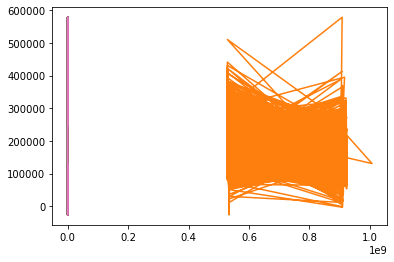

In [131]:
plt.plot(x,lm.predict(x), label='predicted')

In [146]:
#calculating the statistical values for the model
import statsmodels.api as sm


x_add_const=sm.add_constant(x_train)
ols=sm.OLS(y_train, x_add_const)
ans=ols.fit()
print(ans.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     364.1
Date:                Mon, 28 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:17:34   Log-Likelihood:                -21160.
No. Observations:                1806   AIC:                         4.237e+04
Df Residuals:                    1779   BIC:                         4.252e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.663e+05    1.1e+06     -0.424

In [151]:
'''if we need to scale the model then use this'''
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
scaleType='standard'

if scaleType=='standard':
    scaler=StandardScaler()
elif scaleType=='MinMax':
    scaler=minmaxscaler()
elif scaleType=='MaxAbsScaler':
    scaler=MaxAbsScaler()

    scaler.fit(x_train)
    x_train_scaled=scaler.transform(x_train)
    x_test_scaled=scaler.transform(x_test)
    
x_add_const=sm.add_constant(x_train)
ols=sm.OLS(y_train, x_add_const)
ans=ols.fit()
print(ans.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     364.1
Date:                Mon, 28 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:23:19   Log-Likelihood:                -21160.
No. Observations:                1806   AIC:                         4.237e+04
Df Residuals:                    1779   BIC:                         4.252e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.663e+05    1.1e+06     -0.424